# Applying ANN on Cifar 10 Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Importing Data

In [3]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")
print()
print(f"Shape of x_test: {X_test.shape}")
print(f"Shape of y_test: {Y_test.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display images

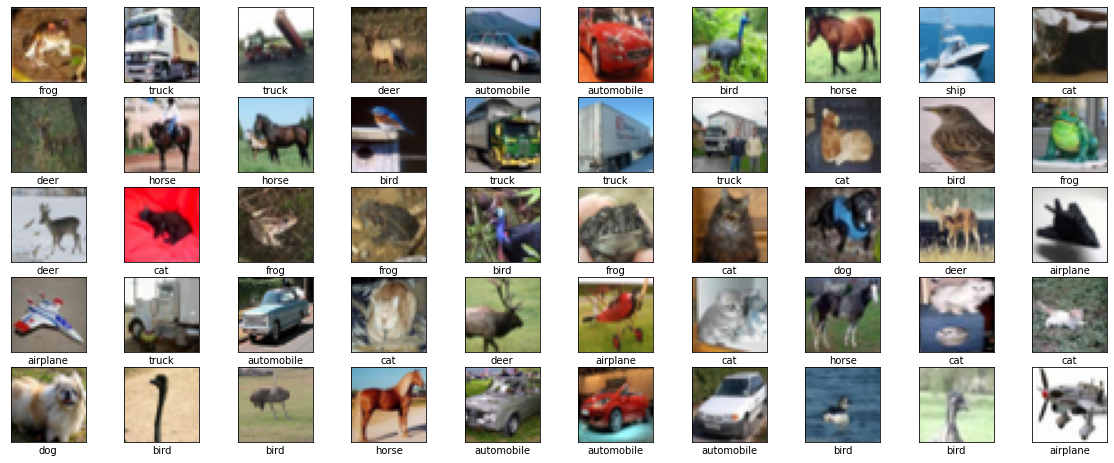

In [5]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

# Normalise data

In [6]:
# reshape  2 d to 1 d 
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

# normalization
X_train=X_train/255
X_test=X_test/255

print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


# Building an ANN Model

In [19]:
# Model Building

model = keras.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_3 (Dense)             (None, 2000)              6002000   
                                                                 
 dense_4 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 17,232,010
Trainable params: 17,232,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Model Compiling
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


In [24]:
# Model Training

h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 120s 93ms/step - loss: 1.9261 - accuracy: 0.3013 - val_loss: 1.7710 - val_accuracy: 0.3558
Epoch 2/5
1250/1250 [==============================] - 113s 90ms/step - loss: 1.7198 - accuracy: 0.3770 - val_loss: 1.7473 - val_accuracy: 0.3688
Epoch 3/5
1250/1250 [==============================] - 113s 90ms/step - loss: 1.6473 - accuracy: 0.4049 - val_loss: 1.6386 - val_accuracy: 0.4156
Epoch 4/5
1250/1250 [==============================] - 113s 91ms/step - loss: 1.5982 - accuracy: 0.4220 - val_loss: 1.5959 - val_accuracy: 0.4314
Epoch 5/5
1250/1250 [==============================] - 114s 91ms/step - loss: 1.5495 - accuracy: 0.4400 - val_loss: 1.5967 - val_accuracy: 0.4236


# Accuracy Vs Epoch and Loss Vs Epoch Graph

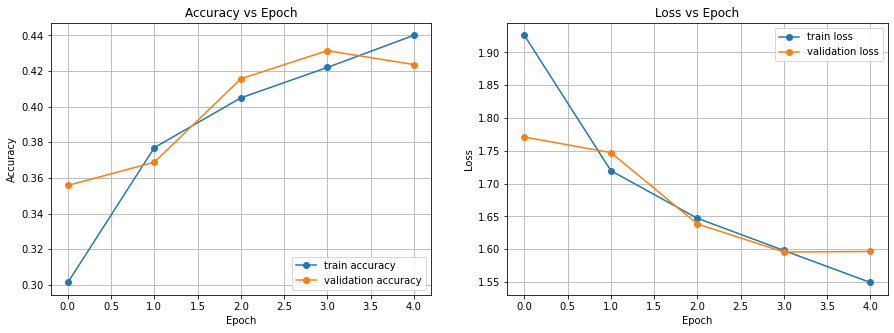

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Model Evaluation

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 17ms/step - loss: 1.5851 - accuracy: 0.4315

Test Accuracy: 0.43149998784065247

Test Loss: 1.585126519203186


# Prediction

In [57]:
# Predict on the first 5 test images
predictions = model.predict(X_test[:5])

In [58]:
# Print our model's predictions
print(np.argmax(predictions, axis=1))

[3 9 8 0 4]


In [59]:
# Check our predictions against the ground truths.
print(Y_test[:5])

[3 8 8 0 6]


# Visualizing the result

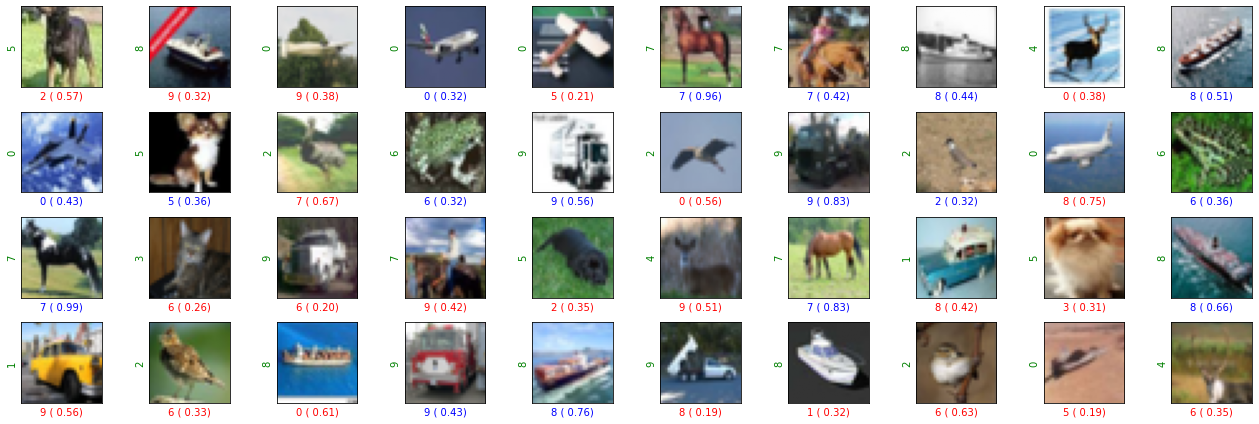

In [46]:
ROWS = 4
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(18,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(32,32,3), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()